In [45]:
%matplotlib inline

import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



In [4]:
files = sorted(glob.glob('./data/input/*.csv.gz'))
files


['./data/input\\20190801.csv.gz']

In [6]:
lis = [1,2,3]
def square(x):
    return x**2

lis2 = map(square, lis)

for i in range(len(lis)):
    print(next(lis2))


1
4
9


In [7]:
df = pd.concat(map(pd.read_csv, files))
df



timestamp  symbol  side   size     price  \
0       2019-08-01D00:00:10.975061000  ADAU19  Sell   8033  0.000006   
1       2019-08-01D00:00:13.148723000  ADAU19  Sell   2468  0.000006   
2       2019-08-01D00:00:22.258687000  ADAU19  Sell   2365  0.000006   
3       2019-08-01D00:00:25.103623000  ADAU19  Sell  36385  0.000006   
4       2019-08-01D00:00:25.205269000  ADAU19  Sell  16571  0.000006   
...                               ...     ...   ...    ...       ...   
840369  2019-08-01D23:57:49.100781000  XRPU19   Buy    100  0.000030   
840370  2019-08-01D23:57:54.001647000  XRPU19   Buy    100  0.000030   
840371  2019-08-01D23:57:57.248999000  XRPU19   Buy    100  0.000030   
840372  2019-08-01D23:58:12.760087000  XRPU19   Buy    593  0.000030   
840373  2019-08-01D23:58:12.760087000  XRPU19   Buy    407  0.000030   

        tickDirection                            trdMatchID  grossValue  \
0           MinusTick  2f3656ee-b8cd-6e9d-61a8-90f8d05cde4b     4811767   
1       ZeroMinusTick  0d00824d-d8a7-3f20-8383-90d5091940aa     1478332   
2       ZeroMinusTick  9822a7c4-7e93-04c0-e094-927082ee33b8     1416635   
3       ZeroMinusTick  58fac956-1469-79ac-0293-95fe7c99679c    21794615   
4       ZeroMinusTick  093d4e31-c9c2-8b83-93e5-d33f6f25bf27     9926029   
...               ...                                   ...         ...   
840369   ZeroPlusTick  adb770fb-0de7-0696-82f4-4c761534cd99      304800   
840370   ZeroPlusTick  520643cc-b582-317b-4c58-528aa6832021      304800   
840371   ZeroPlusTick  faa289e2-e367-1b58-b3b5-ddd278d658fe      304800   
840372   ZeroPlusTick  e9a053b3-bf0a-46c3-e2c1-dedc936535e5     1807464   
840373   ZeroPlusTick  3025544f-e6da-c04a-1656-80d5ff26aabb     1240536   

        homeNotional  foreignNotional  
0             8033.0         0.048118  
1             2468.0         0.014783  
2             2365.0         0.014166  
3            36385.0         0.217946  
4            16571.0         0.099260  
...              ...              ...  
840369         100.0         0.003048  
840370         100.0         0.003048  
840371         100.0         0.003048  
840372         593.0         0.018075  
840373         407.0         0.012405  

[840374 rows x 10 columns]

In [9]:
df = df[df.symbol == 'XBTUSD']
df.head()




timestamp  symbol  side   size    price  \
122492  2019-08-01D00:00:03.817388000  XBTUSD  Sell    849  10088.5   
122493  2019-08-01D00:00:03.817388000  XBTUSD  Sell   1651  10088.5   
122494  2019-08-01D00:00:03.950526000  XBTUSD   Buy  34679  10089.0   
122495  2019-08-01D00:00:03.950526000  XBTUSD   Buy     35  10089.0   
122496  2019-08-01D00:00:03.950526000  XBTUSD   Buy     35  10089.0   

        tickDirection                            trdMatchID  grossValue  \
122492  ZeroMinusTick  7b395739-b7d1-83ad-f9a2-13fb693dab0c     8415288   
122493  ZeroMinusTick  9313c5ef-ce60-f22e-c099-83e896a63628    16364712   
122494       PlusTick  756bfe44-b298-9085-2381-fbeee0164a80   343738248   
122495   ZeroPlusTick  788929c5-c8cb-2f36-4184-7f184852a89a      346920   
122496   ZeroPlusTick  d38ab9fc-892a-1e0f-f1e6-dea1fe1c954c      346920   

        homeNotional  foreignNotional  
122492      0.084153            849.0  
122493      0.163647           1651.0  
122494      3.437382          34679.0  
122495      0.003469             35.0  
122496      0.003469             35.0

In [10]:
df.timestamp = pd.to_datetime(df.timestamp.str.replace('D', 'T'))
df = df.sort_values('timestamp')
df.set_index('timestamp', inplace=True)

In [26]:
df.head()


symbol  side   size    price  tickDirection  \
timestamp                                                                 
2019-08-01 00:00:03.817388  XBTUSD  Sell    849  10088.5  ZeroMinusTick   
2019-08-01 00:00:03.817388  XBTUSD  Sell   1651  10088.5  ZeroMinusTick   
2019-08-01 00:00:03.950526  XBTUSD   Buy  34679  10089.0       PlusTick   
2019-08-01 00:00:03.950526  XBTUSD   Buy     35  10089.0   ZeroPlusTick   
2019-08-01 00:00:03.950526  XBTUSD   Buy     35  10089.0   ZeroPlusTick   

                                                      trdMatchID  grossValue  \
timestamp                                                                      
2019-08-01 00:00:03.817388  7b395739-b7d1-83ad-f9a2-13fb693dab0c     8415288   
2019-08-01 00:00:03.817388  9313c5ef-ce60-f22e-c099-83e896a63628    16364712   
2019-08-01 00:00:03.950526  756bfe44-b298-9085-2381-fbeee0164a80   343738248   
2019-08-01 00:00:03.950526  788929c5-c8cb-2f36-4184-7f184852a89a      346920   
2019-08-01 00:00:03.950526  d38ab9fc-892a-1e0f-f1e6-dea1fe1c954c      346920   

                            homeNotional  foreignNotional  
timestamp                                                  
2019-08-01 00:00:03.817388      0.084153            849.0  
2019-08-01 00:00:03.817388      0.163647           1651.0  
2019-08-01 00:00:03.950526      3.437382          34679.0  
2019-08-01 00:00:03.950526      0.003469             35.0  
2019-08-01 00:00:03.950526      0.003469             35.0

In [32]:
df_vwap = df.groupby(pd.Grouper(freq='1Min')).apply(
    lambda miniDf:   pd.np.sum(miniDf.price * miniDf.size) / pd.np.sum(miniDf.size)
)

df_vwap


C:\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


timestamp
2019-08-01 00:00:00    13636443.5
2019-08-01 00:01:00    16966685.0
2019-08-01 00:02:00    10138587.0
2019-08-01 00:03:00     6537213.0
2019-08-01 00:04:00    10407789.0
                          ...    
2019-08-01 23:55:00     4244124.0
2019-08-01 23:56:00      821930.5
2019-08-01 23:57:00     5327876.0
2019-08-01 23:58:00     5997267.0
2019-08-01 23:59:00      979071.0
Length: 1440, dtype: float64

In [48]:
df_vwap.shape

(1440,)

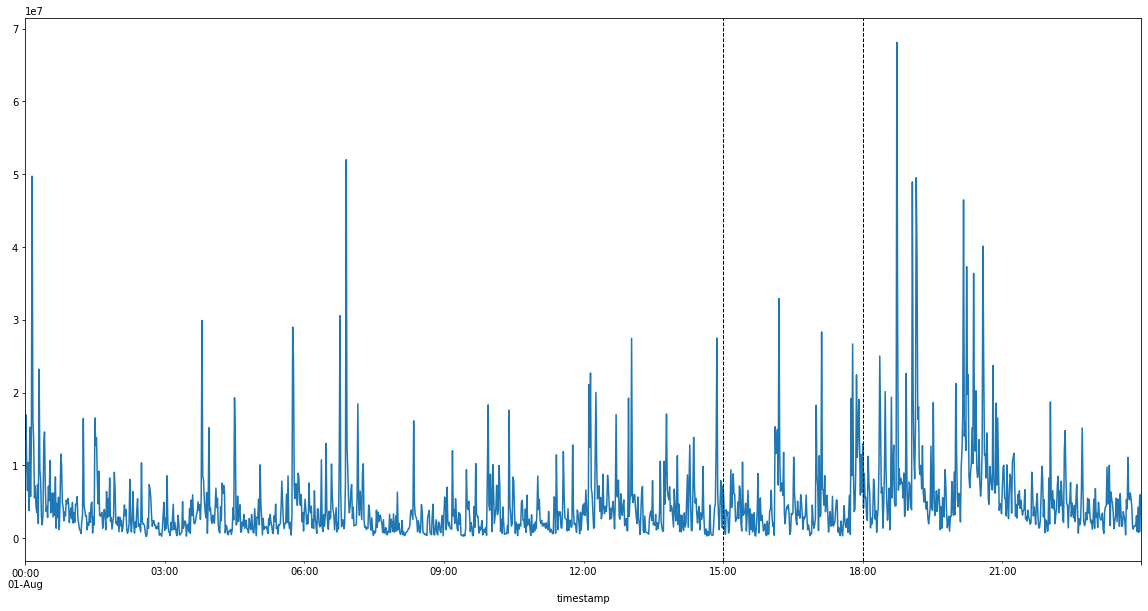

In [58]:
ax = df_vwap.plot(figsize=(20,10))
plt.axvline("2019-08-01T15:00:00", linewidth=1.0, linestyle="--", c="black")
plt.axvline("2019-08-01T18:00:00", linewidth=1.0, linestyle="--", c="black")


In [62]:
df_vwap.head()


timestamp
2019-08-01 00:00:00    13636443.5
2019-08-01 00:01:00    16966685.0
2019-08-01 00:02:00    10138587.0
2019-08-01 00:03:00     6537213.0
2019-08-01 00:04:00    10407789.0
dtype: float64

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df_vwap.to_frame())
